**DS 301: Applied Data Modeling and Predictive Analysis**

**Lecture 18 – PCA**

# PCA with the Iris dataset
Nok Wongpiromsarn, 8 August 2022

**Construct pandas dataframe from iris dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

# Create a dataframe such that the columns are the concatenation 
# of the features and target
df = pd.DataFrame(data = np.c_[iris['data'], iris.target_names[iris['target']]], 
                  columns = iris['feature_names'] + ['target'])
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [2]:
# Separating out the features and target

features = ['sepal length (cm)',
            'sepal width (cm)',
            'petal length (cm)',
            'petal width (cm)',
           ]
x = df[features]
y = df['target']
x.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Standardizing the features**

In [3]:
from sklearn.preprocessing import StandardScaler

x_scaled = pd.DataFrame(data = StandardScaler().fit_transform(x), columns = features)
x_scaled.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


**Projecting to 2D**

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x2d = pd.DataFrame(data = pca.fit_transform(x_scaled), 
                   columns = ['principal component 1', 
                              'principal component 2'
                             ]
                  )
x2d.head(5)

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [5]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.72962445 0.22850762]
0.9581320720000164


**Constructing the final dataframe by concatenating x2d with the target**

In [6]:
df = pd.concat([x2d, y], axis=1)
df.head(5)

,principal component 1,principal component 2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


**Visualizing 2D projection**

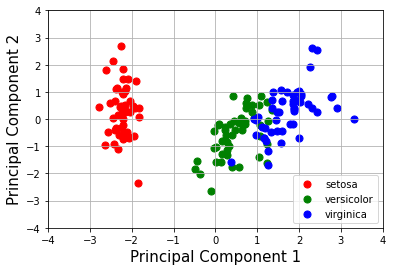

In [7]:
import matplotlib.pyplot as plt

colors = ['r', 'g', 'b']

for target, color in zip(iris.target_names, ['r', 'g', 'b']):
    target_indices = df['target'] == target
    plt.scatter(df.loc[target_indices, 'principal component 1'],
                df.loc[target_indices, 'principal component 2'],
                c = color, s = 50, label = target)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.legend()
plt.grid()
plt.show()